In [1]:
ReloadProject('deep_learning')

Path /workspace/external/ added to PYTHON_PATH.
Path /workspace/external/deep_learning added to PYTHON_PATH.


Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


notebook_init.py imported and reloaded
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: runner_extension_impl
forwarded symbol: runner_extension_impl
reloaded: runner_impl
forwarded symbol: runner_impl
reloaded: shortcut
forwarded symbol: shortcut


# My models

## 20-20-20

In [15]:
pipeline = shortcut.FullRunPipeline(gym_env_name='LunarLander-v2', model_shape=(20, 20, 20))

In [16]:
pipeline.Train(5000)

[19:34:19] logging.py:44 Episode 100/5000: avg_reward = -166.50, avg_steps=96.29 (over 100 episodes)
[19:34:46] logging.py:44 Episode 200/5000: avg_reward = -117.77, avg_steps=105.45 (over 100 episodes)
[19:35:12] logging.py:44 Episode 300/5000: avg_reward = -105.18, avg_steps=113.73 (over 100 episodes)
[19:35:44] logging.py:44 Episode 400/5000: avg_reward = -92.53, avg_steps=130.48 (over 100 episodes)
[19:36:31] logging.py:44 Episode 500/5000: avg_reward = -81.47, avg_steps=161.62 (over 100 episodes)
[19:37:53] logging.py:44 Episode 600/5000: avg_reward = -97.75, avg_steps=252.67 (over 100 episodes)
[19:40:01] logging.py:44 Episode 700/5000: avg_reward = -103.83, avg_steps=366.19 (over 100 episodes)
[19:43:13] logging.py:44 Episode 800/5000: avg_reward = -33.96, avg_steps=448.07 (over 100 episodes)
[19:47:14] logging.py:44 Episode 900/5000: avg_reward = 3.54, avg_steps=588.02 (over 100 episodes)
[19:51:43] logging.py:44 Episode 1000/5000: avg_reward = 16.77, avg_steps=683.13 (over 100

KeyboardInterrupt: 

In [5]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('LunarLander-v2'))
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(20, 20, 20)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

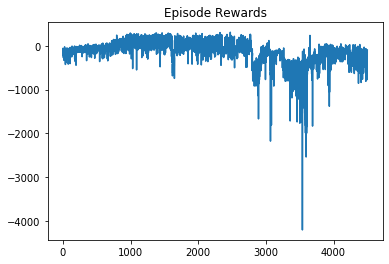

CPU times: user 2min 15s, sys: 1.82 s, total: 2min 17s
Wall time: 2min 21s


In [7]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithDecreasingRandomness(
    initial_epsilon=1.0, final_epsilon=0.05, decay_by_half_after_num_of_episodes=500)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

In [ ]:
trans = runner.SampleFromHistory(size=10)
runner.AddReporter(reporter_impl.ValueTracer(
    trace_states=(t.s for t in trans),
    trace_actions=(0, 1, 2)
))

In [7]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.3)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[23:07:12] q_base.py:415 Episode 0/500: episode_total_reward = -146.07, episode_steps=367
[23:59:58] q_base.py:417 Episode 100/500: episode_total_reward = -60.58, episode_steps=117
[01:58:06] q_base.py:417 Episode 200/500: episode_total_reward = -67.60, episode_steps=639
[03:58:17] q_base.py:417 Episode 300/500: episode_total_reward = 76.50, episode_steps=999


KeyboardInterrupt: 

In [18]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[04:36:03] q_base.py:415 Episode 0/500: episode_total_reward = -54.28, episode_steps=999
[06:29:59] q_base.py:417 Episode 100/500: episode_total_reward = -163.84, episode_steps=210
[08:17:23] q_base.py:417 Episode 200/500: episode_total_reward = 153.82, episode_steps=941
[10:09:09] q_base.py:417 Episode 300/500: episode_total_reward = -62.20, episode_steps=156
[12:13:01] q_base.py:417 Episode 400/500: episode_total_reward = -131.51, episode_steps=442
CPU times: user 9h 48min 1s, sys: 2min 56s, total: 9h 50min 58s
Wall time: 9h 57min 34s


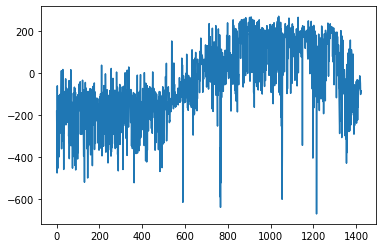

CPU times: user 2h 26min 14s, sys: 13.5 s, total: 2h 26min 27s
Wall time: 2h 26min 50s


In [19]:
%%time
# Test
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [16]:
# qfunc.SaveModel('saved_models/lunarlander_shape_20-20-20_rmsprop_gamma_099.model')

TypeError: super(type, obj): obj must be an instance or subtype of type

In [20]:
qfunc._model.save_weights('saved_models/lunarlander_shape_20-20-20_rmsprop_gamma_0.99_2019-07-25.weights')